In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import pandas as pd

## Data Preparation

In [2]:
# See the data-prep.py file for the data prepation.
# Run it.
# It will create for numpy array named train_X.npy, train_y.npy, test_X.npy and test_y.npy
# train_X -> training images with shape (32, 32) each
# train_y -> training label of images. label 0 for no (10,000), 1 for sphere (10,000) and  2 for vort (10,000)
# test_X -> testing images with shape (32, 32) each
# test_y -> testing label of images. label 0 for no (2,500), 1 for sphere (2,500) and  2 for vort (2,500)

## Load Data

In [3]:
# Load the data by np.load() method

In [4]:
train_X = np.load('train_X.npy')
train_y = np.load('train_y.npy')

test_X = np.load('test_X.npy')
test_y = np.load('test_y.npy')

In [5]:
# If you see the train_y or test_y, all the samples are not shuffled.
# So, we need to shuffle the data.

In [6]:
# This will shuffle the traininig data

train = list(zip(train_X, train_y))

random.shuffle(train)

train_X, train_y = zip(*train)

train_X = np.array(train_X)
train_y = np.array(train_y)

In [7]:
# This will shuffle the testing data

test = list(zip(test_X, test_y))

random.shuffle(test)

test_X, test_y = zip(*test)

test_X = np.array(test_X)
test_y = np.array(test_y)

In [8]:
# Now, the data is shuffled.

## Look Around Data

In [9]:
# Let's see the data

In [10]:
# Shape of the data

print(f' Shape of the training data: {train_X.shape}')
print(f' Shape of the training label: {train_y.shape}')
print(f' Shape of the testing data: {test_X.shape}')
print(f' Shape of the testing label: {test_y.shape}')

 Shape of the training data: (30000, 32, 32)
 Shape of the training label: (30000,)
 Shape of the testing data: (7500, 32, 32)
 Shape of the testing label: (7500,)


<AxesSubplot:>

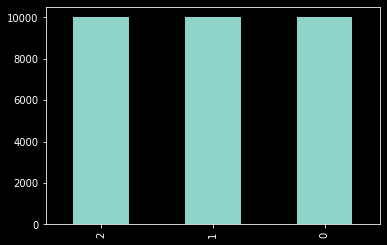

In [11]:
# Plot frequency of each class in training data

df = pd.DataFrame(train_y, columns=['label'])
df['label'].value_counts().plot(kind='bar')

<AxesSubplot:>

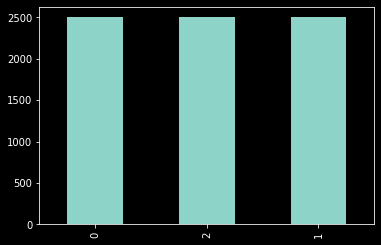

In [12]:
# Plot frequency of each class in testing data

df = pd.DataFrame(test_y, columns=['label'])
df['label'].value_counts().plot(kind='bar')

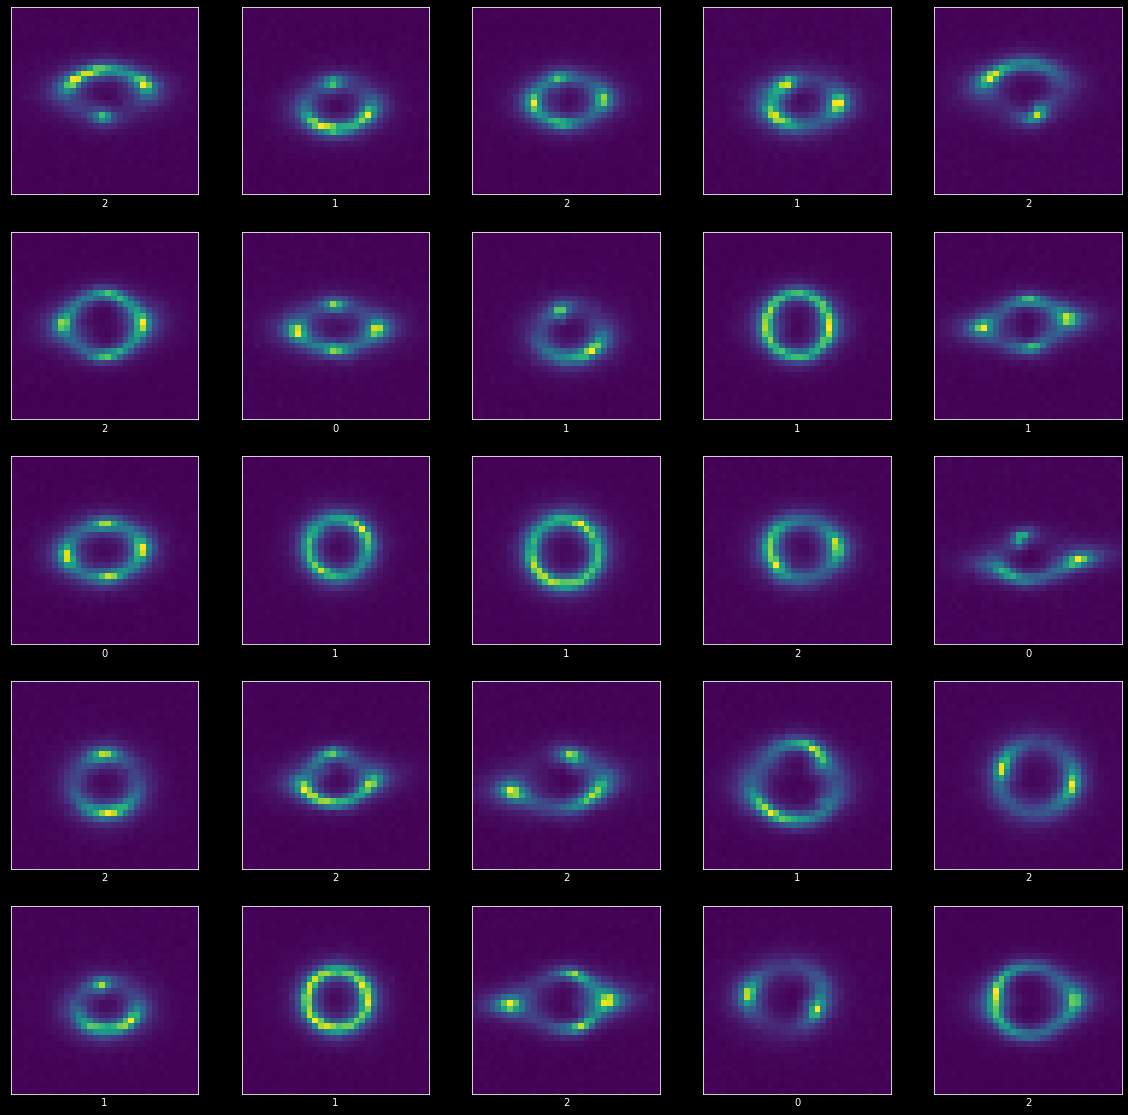

In [13]:
# 5 X 5 grid of images

plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i])
    plt.xlabel(train_y[i])
plt.show()

## Training and Testing

In [14]:
# Since this is an image classification problem, we should start wit a Convolutional Neural Network.
# But, I will start with a simple Dense Neural Network.

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32)),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_4 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_5 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 6,301,699
Trainable params: 6,301,699
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(train_X, train_y, epochs=500, validation_data=(test_X, test_y))

Epoch 1/500
938/938 [==============================] - 6s 6ms/step - loss: 1.1008 - accuracy: 0.3316 - val_loss: 1.0985 - val_accuracy: 0.3368
Epoch 2/500
938/938 [==============================] - 6s 6ms/step - loss: 1.0985 - accuracy: 0.3409 - val_loss: 1.0984 - val_accuracy: 0.3453
Epoch 3/500
938/938 [==============================] - 5s 6ms/step - loss: 1.0985 - accuracy: 0.3423 - val_loss: 1.0991 - val_accuracy: 0.3352
Epoch 4/500
938/938 [==============================] - 5s 6ms/step - loss: 1.0982 - accuracy: 0.3418 - val_loss: 1.0984 - val_accuracy: 0.3427
Epoch 5/500
938/938 [==============================] - 5s 5ms/step - loss: 1.0978 - accuracy: 0.3450 - val_loss: 1.0982 - val_accuracy: 0.3321
Epoch 6/500
938/938 [==============================] - 5s 5ms/step - loss: 1.0978 - accuracy: 0.3381 - val_loss: 1.0983 - val_accuracy: 0.3407
Epoch 7/500
938/938 [==============================] - 5s 5ms/step - loss: 1.0979 - accuracy: 0.3418 - val_loss: 1.0975 - val_accuracy: 0.3396

In [ ]:
loss, accuracy = model.evaluate(test_X, test_y)

In [ ]:
# Plot learning curve

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.show()


In [ ]:
# Now let's create Convolutional Neural Network.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(32, 32)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y))

In [ ]:
loss, accuracy = model.evaluate(test_X, test_y)

In [ ]:
# Plot learning curve

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.show()


## Further Processing

In [ ]:
# We can see that the accuracy is not satisfiable.
# So, we can try with a more complex CNN.
# Also, we can create the 3-color channel images and train the more complex CNN with them.
# We can use data augmentation.
# Further we can try pre-trained model like VGG16, VGG19, ResNet50, InceptionV3, MobileNet, etc. for 3-channel images.
# We can also use images with higher resolution.
# And training can be done on cloud resources.

#### Sahil Bharodiya
##### Email: sahilbharodiya.ppsv2@gmail.com
##### WhatsApp or Signal: +91 9173661451
##### LinkedIn: https://www.linkedin.com/in/sahil-bharodiya-5ab137202/